In [7]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import xgboost

from sklearn import metrics
from sklearn.model_selection import train_test_split

## Data

##### First, get the .csv file containing the titanic data from https://calmcode.io/static/data/titanic.csv

In [8]:
df = pd.read_csv('../titanic_data.csv')
df = df[["pclass","sex","age","survived"]]
df.dropna(inplace=True)

features = df.columns

# Column sex is type string. Encode it to numerical
mapping = {"female": 0, "male": 1}
df["sex"] = df["sex"].map(mapping)

# Train test split
X_data = df[['pclass', 'sex', 'age']].values
y_data = df['survived'].values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

## Model

In [9]:
def accuracy(true_values, predictions):
    return np.mean(true_values == predictions)

Accuracy:  0.8697674418604651
Precision:  0.8717948717948718
Sensitivity / recall:  0.7906976744186046


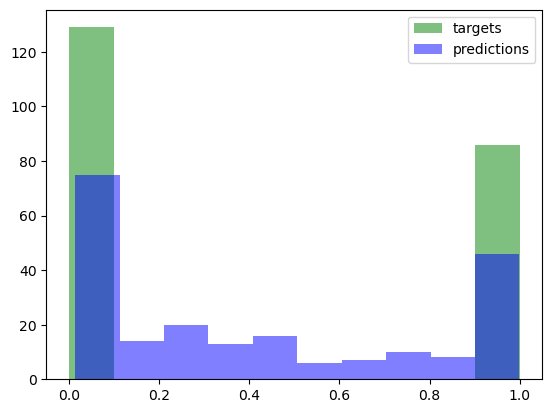

In [10]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

# Predict and evaluate model 
predictions = model.predict(X_test)
print("Accuracy: ", accuracy(y_test, predictions))
print("Precision: ", metrics.precision_score(y_test, predictions))
print("Sensitivity / recall: ", metrics.recall_score(y_test, predictions))

probs  = model.predict_proba(X_test)[:,1]

plt.hist(y_test, color="green", alpha=0.5, label="targets")
plt.hist(probs, color="blue", alpha=0.5, label="predictions")
plt.legend()
plt.show()

In [11]:
def niceprint(l):
    gender = "male" if l[1] == 1 else "female"
    print("Pclass\t|     Gender\t|\tAge\t|")
    print(f"{l[0]} \t|     {gender}\t|\t{l[2]}\t|")

In [12]:
X_paul = [2, 1, 25]
pred_paul = model.predict_proba([X_paul])
print("Paul:")
niceprint(X_paul)
print(f"Chance for survival: {pred_paul[0][1]}\n")

Paul:
Pclass	|     Gender	|	Age	|
2 	|     male	|	25	|
Chance for survival: 0.0703936442732811



In [13]:
print("Chance for survival of counterfactual Paul with")
for cf in [[1,1,25], [2,0,25], [2,1,12]]: 
    niceprint(cf)
    print("is:", model.predict_proba([cf])[0][1])

Chance for survival of counterfactual Paul with
Pclass	|     Gender	|	Age	|
1 	|     male	|	25	|
is: 0.7663219
Pclass	|     Gender	|	Age	|
2 	|     female	|	25	|
is: 0.64023286
Pclass	|     Gender	|	Age	|
2 	|     male	|	12	|
is: 0.8534521
